In [3]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


character(0)

<a id="1"></a> <br>
## 1. Importación de librerías y de datos
Comenzaremos con la importación de librerías y datos.

In [4]:
#Incluimos las librerías de modelamiento y manejo de datos.
install.packages('MTS')
install.packages("devtools")
library(devtools)
library(fpp3)
library(urca)
library(vars)
library(quantmod) #Para obtener datos financiera
library(dygraphs)  # data visualization

#install.packages("CCA")
devtools::install_version("pbkrtest", version = "0.5.1")
#install.packages("devtools")
devtools::install_github("Natsiopoulos/ARDL")
### Para el modelado
library(ARDL)
#Otros de manipulación de datos
library(fields)  
library(forecast)  
library(dplyr)    
library(ggplot2) 
library(tseries)   
library(urca)
library(TSstudio)
theme_set(theme_bw())
options(warn = - 1) 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: usethis

── Attaching packages ────────────────────────────────────────────── fpp3 0.5 ──

✔ tsibble     1.1.3     ✔ fable       0.3.2
✔ tsibbledata 0.4.1     ✔ fabletools  0.3.2
✔ feasts      0.3.0     

── Conflicts ───────────────────────────────────────────────── fpp3_conflicts ──
✖ lubridate::date()    masks base::date()
✖ dplyr::filter()      masks stats::filter()
✖ tsibble::intersect() masks base::intersect()
✖ tsibble::interval()  masks lubridate::interval()
✖ dplyr::lag()         masks stats::lag()
✖ tsibble::setdiff()   masks base::setdiff()
✖ tsibble::union()     masks base::union()

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: strucchange

Loading required package: zoo


Attachi

xfun     (0.37   -> 0.39  ) [CRAN]
rlang    (1.0.6  -> 1.1.1 ) [CRAN]
cli      (3.6.0  -> 3.6.1 ) [CRAN]
vctrs    (0.5.2  -> 0.6.2 ) [CRAN]
pillar   (1.8.1  -> 1.9.0 ) [CRAN]
tibble   (3.1.8  -> 3.2.1 ) [CRAN]
dplyr    (1.1.0  -> 1.1.2 ) [CRAN]
fs       (1.6.1  -> 1.6.2 ) [CRAN]
waldo    (0.4.0  -> 0.5.1 ) [CRAN]
ps       (1.7.2  -> 1.7.5 ) [CRAN]
processx (3.8.0  -> 3.8.1 ) [CRAN]
evaluate (0.20   -> 0.21  ) [CRAN]
testthat (3.1.6  -> 3.1.8 ) [CRAN]
knitr    (1.42   -> 1.43  ) [CRAN]
broom    (1.0.3  -> 1.0.4 ) [CRAN]
lme4     (1.1-31 -> 1.1-33) [CRAN]


Installing 16 packages: xfun, rlang, cli, vctrs, pillar, tibble, dplyr, fs, waldo, ps, processx, evaluate, testthat, knitr, broom, lme4

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in i.p(...):
“installation of package ‘rlang’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘cli’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘fs’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘vctrs’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘pillar’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘tibble’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘dplyr’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘testthat’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspec

zoo         (1.8-11 -> 1.8-12) [CRAN]
vctrs       (0.5.2  -> 0.6.2 ) [CRAN]
pillar      (1.8.1  -> 1.9.0 ) [CRAN]
tibble      (3.1.8  -> 3.2.1 ) [CRAN]
fs          (1.6.1  -> 1.6.2 ) [CRAN]
testthat    (3.1.6  -> 3.1.8 ) [CRAN]
cli         (3.6.0  -> 3.6.1 ) [CRAN]
viridisLite (0.4.1  -> 0.4.2 ) [CRAN]
rlang       (1.0.6  -> 1.1.1 ) [CRAN]
quantreg    (5.94   -> 5.95  ) [CRAN]
car         (NA     -> 3.1-2 ) [CRAN]
dynlm       (NA     -> 0.3-6 ) [CRAN]
dplyr       (1.1.0  -> 1.1.2 ) [CRAN]


Skipping 1 packages not available: pbkrtest

Installing 13 packages: zoo, vctrs, pillar, tibble, fs, testthat, cli, viridisLite, rlang, quantreg, car, dynlm, dplyr

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in i.p(...):
“installation of package ‘fs’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘cli’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘rlang’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘vctrs’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘testthat’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘pillar’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘tibble’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘dplyr’ had non-zero exit status”


── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/Rtmp70cfuO/remotes236c3ecf06/Natsiopoulos-ARDL-5ae0892/DESCRIPTION’ ... OK
* preparing ‘ARDL’:
* checking DESCRIPTION meta-information ... OK
* installing the package to process help pages
* saving partial Rd database
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘ARDL_0.2.3.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

To cite the ARDL package in publications:

Use this reference to refer to the validity of the ARDL package.

  Natsiopoulos, Kleanthis, and Tzeremes, Nickolaos G. (2022). ARDL
  bounds test for cointegration: Replicating the Pesaran et al. (2001)
  results for the UK earnings equation using R. Journal of Applied
  Econometrics, 37(5), 1079-1090. https://doi.org/10.1002/jae.2919

Use this reference to cite this specific version of the ARDL package.

  Kleanthis Natsiopoulos and Nickolaos Tzeremes (2023). ARDL: ARDL, ECM
  and Bounds-Test for Cointegration. R package version 0.2.3.
  https://CRAN.R-project.org/package=ARDL

Loading required package: spam

Spam version 2.9-1 (2022-08-07) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)

In [5]:
install.packages("MTS_VERSION.tar.gz",repos=NULL,type="source")
library(MTS)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘MTS’


The following object is masked from ‘package:TTR’:

    VMA


The following object is masked from ‘package:vars’:

    VAR


The following object is masked from ‘package:fable’:

    VAR




# Obtención de datos

Se importan los datos desde Yahoo Finance

In [6]:
###Función para obtener datos:
start<-format(as.Date("2019-04-22"),"%Y-%m-%d")
end<-format(as.Date("2022-12-31"),"%Y-%m-%d")

precios <-function(simbolo)
{
  ##Obtener precios stocks de Yahoo FInance
  datos <- getSymbols(simbolo, auto.assign = FALSE, from=start, to=end)
  ## Elimar faltantes:
  datos<-na.omit(datos)
  ##mantener columnas con precios cierre 4:
  datos <- datos[,4]
  ##Para hacerlo datos accesibles en el global environment:
  assign(simbolo, datos, envir = .GlobalEnv)
}


Se importa la información con los precios de cierre de RYLD, TSLA, TM y GM en las fechas: 22-04-2019 al 31-12-2022.

In [7]:
precios("RYLD")
precios("TSLA")
precios("TM")
precios("GM")

In [8]:
##Juntar los datos y renombrarlos:
Pr<-merge.xts(RYLD,TSLA,TM, GM) %>% na.omit()
colnames(Pr) <- c("RYLD","TSLA","TM","GM")
head(Pr)

##Serie tiempo, grafica interactiva
Precios<- dygraph(Pr) %>%
  dyAxis("y", label = "Precios") %>%
  dyRangeSelector(dateWindow = c("2019-04-22", "2022-12-31"))%>%
  dyOptions(colors = RColorBrewer::brewer.pal(4,"Set1"))
Precios

             RYLD     TSLA     TM    GM
2019-04-22 24.995 17.51667 124.16 39.50
2019-04-23 25.157 17.59333 124.94 39.83
2019-04-24 25.189 17.24400 122.88 39.72
2019-04-25 25.130 16.50867 123.19 39.11
2019-04-26 25.225 15.67600 123.62 39.68
2019-04-29 25.250 16.09800 123.81 40.01

HTML widgets cannot be represented in plain text (need html)

In [9]:
summary(Pr)

     Index                 RYLD            TSLA              TM       
 Min.   :2019-04-22   Min.   :14.90   Min.   : 11.93   Min.   :108.5  
 1st Qu.:2020-03-24   1st Qu.:20.75   1st Qu.: 48.81   1st Qu.:132.1  
 Median :2021-02-25   Median :23.50   Median :201.56   Median :143.1  
 Mean   :2021-02-23   Mean   :22.81   Mean   :170.55   Mean   :149.5  
 3rd Qu.:2022-01-27   3rd Qu.:25.12   3rd Qu.:258.86   3rd Qu.:166.4  
 Max.   :2022-12-30   Max.   :25.89   Max.   :409.97   Max.   :211.4  
       GM       
 Min.   :16.80  
 1st Qu.:34.65  
 Median :38.55  
 Mean   :41.26  
 3rd Qu.:51.51  
 Max.   :65.74  

* "RYLD"es un fondo cotizado (ETF) llamado "Global X Russell 2000 Covered Call ETF". Este es utilizado para las acciones de pequeña capitalización en Estados Unidos y representa aprox a 2,000 de las empresas más pequeñas en términos de capitalización de mercado dentro del universo de acciones estadounidenses. Podemos ver que los valores mínimos alcanzados son de 14.90 y los máximos son de 25.80 siendo su media 22.81 muy carcana a su mediana 23.50
* "TSLA" corresponde a Tesla, Inc., una empresa de automóviles eléctricos y energía renovable. En el caso de TESLA vemos que sus mínimos son de 11.93 y que ha alcanzado valores hasta de 409.97 con promedios de 170.55. Se destaca que en el 50% del tiempo analizado presenta valores superiores a 201.56
* "TM" corresponde a Toyota Motor Corporation, una empresa automotriz japonesa. Mínimos de 108 ymáximos de 211. Con una media de 149.5 y una mediana muy cercana a su media 143.1,
* "GM" corresponde a General Motors Company, una empresa automotriz estadounidense.Mínimos de 16.80, máximos de 65.74 y una mediana de 41.26. En el 50% del tiempo presenta valores superiores a 38.55

# 1. Implementación de Modelos VAR

<a id="2"></a> <br>
### Identificación nivel regresivo y prueba de cointegración

In [10]:
#Identificamos el nivel regresivo, mediante la función VARselect
nivelka=VARselect(Pr, lag.max = 7, type = "const")
nivelka$selection

AIC(n)  HQ(n)  SC(n) FPE(n) 
     3      1      1      3

Los resultados de la prueba de criterio de información muestran que el orden regresivo es 3. Este orden es el que se le indica a la función de cointegración, que se muestra a continuación, así como el modelo de VAR.

In [11]:
# Aplicamos la prueba de Johansen para la identificación de relaciones lineales entre las series, lo que nos indica la condición de cointegración.
johatest=ca.jo(Pr, type = "trace", K=3, ecdet ="none", spec = "longrun") #
summary(johatest)


###################### 
# Johansen-Procedure # 
###################### 

Test type: trace statistic , with linear trend 

Eigenvalues (lambda):
[1] 0.025178838 0.013551621 0.005454097 0.001665807

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 3 |  1.55  6.50  8.18 11.65
r <= 2 |  6.64 15.66 17.95 23.52
r <= 1 | 19.33 28.71 31.52 37.22
r = 0  | 43.04 45.23 48.28 55.43

Eigenvectors, normalised to first column:
(These are the cointegration relations)

            RYLD.l3     TSLA.l3        TM.l3      GM.l3
RYLD.l3  1.00000000  1.00000000  1.000000000 1.00000000
TSLA.l3  0.04047053  0.01420505 -0.006160054 0.07517972
TM.l3   -0.19656578  0.11367109 -0.016570997 0.04088030
GM.l3   -0.13677494 -0.47698181 -0.007522605 0.33936229

Weights W:
(This is the loading matrix)

            RYLD.l3      TSLA.l3        TM.l3         GM.l3
RYLD.d -0.001673258 -0.005669912 -0.003600595 -0.0005984272
TSLA.d -0.150221009  0.046282145  0.103842678 -0.02176398

Como podemos observar a partir de los resultados de la prueba de cointegración, las series no están cointegradas. Debemos así revisar si las series son estacionarias, para poder proceder con la diferenciación y modelo VAR.

<a id="3"></a> <br>
### Diferenciación de las series

In [12]:
# Importamos la librería de tserires para la aplicación de la prueba de Dickey Fuller.

#Conjunto de train
library(tseries)
adf.test(Pr[,1])
adf.test(Pr[,2])
adf.test(Pr[,3])
adf.test(Pr[,4])



	Augmented Dickey-Fuller Test

data:  Pr[, 1]
Dickey-Fuller = -1.9681, Lag order = 9, p-value = 0.5918
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  Pr[, 2]
Dickey-Fuller = -0.82177, Lag order = 9, p-value = 0.9597
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  Pr[, 3]
Dickey-Fuller = -1.3187, Lag order = 9, p-value = 0.8667
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  Pr[, 4]
Dickey-Fuller = -1.3763, Lag order = 9, p-value = 0.8423
alternative hypothesis: stationary


Como podemos observar de los resultados de la prueba Dickey_Fuller, las series no son estacionarias ya que el p-valor en cada uno de los resultados, muestran la presencia de una raíz unitaria. Con ello, debemos proceder a diferenciar las series.

Para diferenciar las series, vamos a aplicar la función diff() y posteriormente, unir las series en un dataframe en la variable z

In [13]:
ryld=diff(Pr[,1],1)
tsla=diff((Pr[,2]),1)
tm=diff(Pr[,3],1)
gm=diff(Pr[,4],1)

z=cbind.data.frame(ryld,tsla,tm,gm)
z = z[2:933,]
tail(z)
str(z)

,RYLD,TSLA,TM,GM
,<dbl>,<dbl>,<dbl>,<dbl>
2022-12-22,-0.100000,-12.220009,-0.460007,-2.370003
2022-12-23,0.050001,-2.199996,0.139999,0.300003
2022-12-27,-0.030001,-14.050004,-0.979995,-0.510002
2022-12-28,-0.139999,3.610001,-2.029999,-0.790001
2022-12-29,0.059999,9.110001,3.279999,1.139999
2022-12-30,-0.030001,1.360000,-0.830002,-0.029999


'data.frame':	932 obs. of  4 variables:
 $ RYLD: num  0.162 0.032 -0.059 0.095 0.025 ...
 $ TSLA: num  0.0767 -0.3493 -0.7353 -0.8327 0.422 ...
 $ TM  : num  0.78 -2.06 0.31 0.43 0.19 ...
 $ GM  : num  0.33 -0.11 -0.61 0.57 0.33 ...


### Creación de Conjunto de Entrenamiento y Prueba para modelo VAR

Partimos serie para train & test conservando un 5% de los datos para prueba

In [14]:

h <- round(nrow(z)*0.05)
Pr_tra <- z[1:(nrow(z) - h), ]
Pr_tes<- z[(nrow(z) - h + 1):nrow(z), ]

h

[1] 47

<a id="4"></a> <br>
## 1.1 Primer experiemento con librería vars

Ya que tenemos las series diferenciadas y sabemos que no están cointegradas, podemos proceder a aplicar VAR

<a id="7"></a> <br>
#### Selección orden regresivo
Procedemos a identificar el nivel regresivo de las series.

In [15]:
# En la librería de VAR, la función que permite identificar el orden regresivo es la función de VARselect(). Se elige el máximo de rezagos de lag.max=7.
nivelk=VARselect(Pr_tra, lag.max = 10, type = "const")
nivelk$selection

AIC(n)  HQ(n)  SC(n) FPE(n) 
     2      2      1      2

Los resultados muestran que el orden a seleccionar debería ser 2

<a id="8"></a> <br>
#### Generación del Modelo de Regresión

Apliquemos la función de vars():

In [16]:
#Podemos volver a llamar la librería de vars y aplicar el regresión habiendo encontrado que p=2.
library(vars)
m0=vars::VAR(Pr_tra, p=2)
summary(m0)


VAR Estimation Results:
Endogenous variables: RYLD, TSLA, TM, GM 
Deterministic variables: const 
Sample size: 883 
Log Likelihood: -6062.921 
Roots of the characteristic polynomial:
0.5707 0.4178 0.2799 0.2799 0.2761 0.2761 0.1395 0.09844
Call:
vars::VAR(y = Pr_tra, p = 2)


Estimation results for equation RYLD: 
RYLD = RYLD.l1 + TSLA.l1 + TM.l1 + GM.l1 + RYLD.l2 + TSLA.l2 + TM.l2 + GM.l2 + const 

          Estimate Std. Error t value Pr(>|t|)    
RYLD.l1 -0.1404906  0.0427211  -3.289  0.00105 ** 
TSLA.l1  0.0003732  0.0011952   0.312  0.75490    
TM.l1   -0.0017988  0.0046631  -0.386  0.69977    
GM.l1    0.0152832  0.0104306   1.465  0.14322    
RYLD.l2  0.2856286  0.0428700   6.663 4.75e-11 ***
TSLA.l2 -0.0023379  0.0011954  -1.956  0.05081 .  
TM.l2   -0.0001906  0.0046566  -0.041  0.96736    
GM.l2   -0.0206117  0.0104105  -1.980  0.04803 *  
const   -0.0054134  0.0088864  -0.609  0.54256    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Residual standard

Como podemos observar a partir de los resultados de regresión, tenemos tres ecuaciones de regresión que corresponden a cada uno de las acciones. Podemos concluir a un nivel de significancia del 5% que:

1. En la regresión de Global X Russell 2000 Covered Call ETF, su precio de cierre dependería de su primer y segundo rezagos y del segundo rezago de GM
2. En la regresión de Tesla vemos que su precio de cierre no depende de ninguno de sus rezagos
3. En la regresión de Toyoya, su precio de cierre dependería de su primer rezago.
4. En la regresión de GM, su precio de cierre dependería del primer rezago de TESLA y del segundo rezago del Global X Russell.

<a id="9"></a> <br>
## 1.2 Segundo Experimento: Modelación con libreria MTS


<a id="9a"></a> <br>
#### Selección del orden regresivo

Este es un primer paso en la modelación.

In [17]:
# En la librería de MTS, la función que permite la identificación del nivel regresivo es la de VARorder().
VARorder(Pr_tra) 

selected order: aic =  2 
selected order: bic =  0 
selected order: hq =  2 
Summary table:  
       p    AIC    BIC     HQ    M(p) p-value
 [1,]  0 2.5661 2.5661 2.5661  0.0000  0.0000
 [2,]  1 2.5449 2.6314 2.5780 49.7083  0.0000
 [3,]  2 2.4953 2.6684 2.5615 73.9426  0.0000
 [4,]  3 2.5222 2.7818 2.6215  7.9571  0.9501
 [5,]  4 2.5303 2.8764 2.6626 24.0192  0.0891
 [6,]  5 2.5446 2.9772 2.7100 18.5593  0.2922
 [7,]  6 2.5595 3.0786 2.7580 18.0183  0.3228
 [8,]  7 2.5537 3.1593 2.7852 35.3461  0.0036
 [9,]  8 2.5613 3.2535 2.8259 23.9210  0.0912
[10,]  9 2.5573 3.3360 2.8550 33.5402  0.0063
[11,] 10 2.5694 3.4346 2.9002 19.9465  0.2226
[12,] 11 2.5765 3.5282 2.9403 24.0472  0.0885
[13,] 12 2.5973 3.6355 2.9942 12.6425  0.6987
[14,] 13 2.6195 3.7443 3.0495 11.3889  0.7849


Como podemos observar, el p-valor de la prueba de criterio de información señala que p=2, ya que el p-valor se infla en el tercer rezago. Igualmente, esta selección podría ser en p=7. Elegimos p=2 por simplicidad del modelo.

<a id="9b"></a> <br>
#### Generación del Modelo de Regresión

Generemos el modelo de regresión.

In [18]:
#Ahora, aplicamos la función de VAR, para generar el modelo de regresión:
m1=MTS::VAR(Pr_tra,2)


Constant term: 
Estimates:  -0.005413425 0.2545004 0.00738861 -0.00198523 
Std.Error:  0.008886437 0.2742414 0.07765216 0.03683012 
AR coefficient matrix 
AR( 1 )-matrix 
        [,1]      [,2]    [,3]     [,4]
[1,] -0.1405  0.000373 -0.0018  0.01528
[2,]  1.2525 -0.043873 -0.0131 -0.35200
[3,] -1.0907  0.014009  0.0122  0.09280
[4,] -0.0555  0.009925 -0.0102 -0.00975
standard error 
       [,1]    [,2]    [,3]   [,4]
[1,] 0.0427 0.00120 0.00466 0.0104
[2,] 1.3184 0.03688 0.14391 0.3219
[3,] 0.3733 0.01044 0.04075 0.0911
[4,] 0.1771 0.00495 0.01933 0.0432
AR( 2 )-matrix 
      [,1]     [,2]      [,3]    [,4]
[1,] 0.286 -0.00234 -0.000191 -0.0206
[2,] 2.394 -0.01228 -0.016173 -0.0696
[3,] 0.243 -0.00693  0.012395  0.1269
[4,] 0.442 -0.00867 -0.032857 -0.0179
standard error 
       [,1]    [,2]    [,3]   [,4]
[1,] 0.0429 0.00120 0.00466 0.0104
[2,] 1.3230 0.03689 0.14371 0.3213
[3,] 0.3746 0.01045 0.04069 0.0910
[4,] 0.1777 0.00495 0.01930 0.0431
  
Residuals cov-mtx: 
           [,1]   

Como podemos observar, estos resultados son iguales que los obtenidos por la librería de vars. Revisemos ahora, los residuales.

Ljung-Box Statistics:  
          m       Q(m)     df    p-value
 [1,]   1.000     0.193 -20.000     1.00
 [2,]   2.000     0.890  -4.000     1.00
 [3,]   3.000     6.124  12.000     1.00
 [4,]   4.000    32.267  28.000     0.26
 [5,]   5.000    49.949  44.000     0.25
 [6,]   6.000    66.022  60.000     0.28
 [7,]   7.000    99.954  76.000     0.03
 [8,]   8.000   126.774  92.000     0.01
 [9,]   9.000   167.835 108.000     0.00
[10,]  10.000   183.934 124.000     0.00
[11,]  11.000   203.825 140.000     0.00
[12,]  12.000   215.183 156.000     0.00
[13,]  13.000   226.861 172.000     0.00
[14,]  14.000   250.189 188.000     0.00
[15,]  15.000   274.746 204.000     0.00
[16,]  16.000   292.363 220.000     0.00
[17,]  17.000   315.377 236.000     0.00
[18,]  18.000   337.159 252.000     0.00
[19,]  19.000   379.438 268.000     0.00
[20,]  20.000   388.513 284.000     0.00
[21,]  21.000   402.650 300.000     0.00
[22,]  22.000   415.505 316.000     0.00
[23,]  23.000   434.643 332.000  

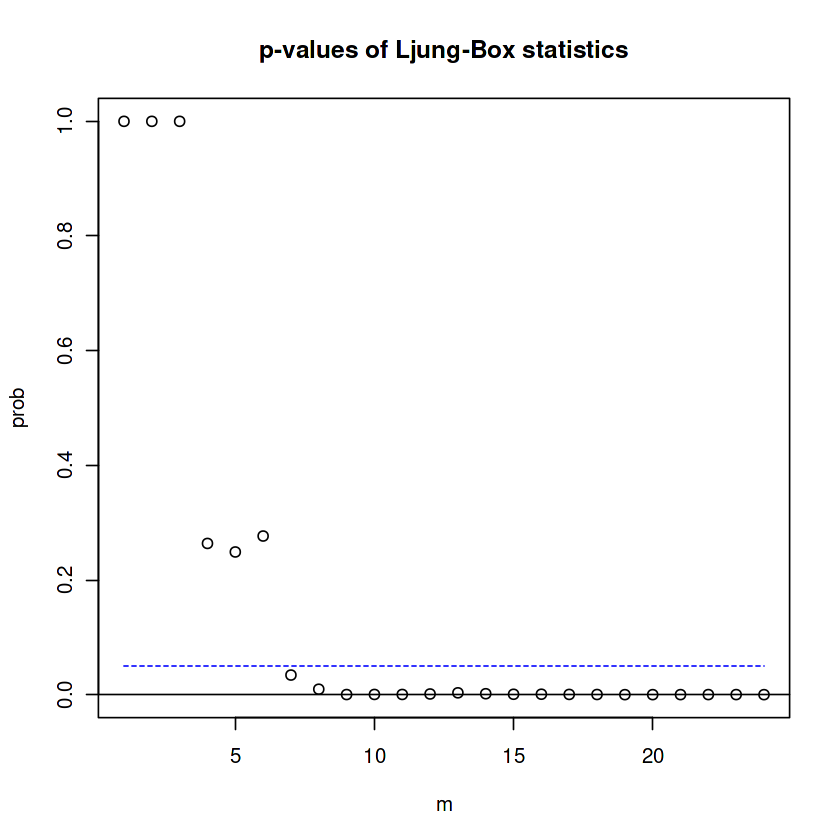

In [19]:
#Separemos primero los residuales del modelo de regresión y apliquemos la función de mq() para la revisión de la calidad del modelo.
#Indicamos los grados de libertad del modelo, que son 36 (2 matrices autorregresivas de 16 coeficientes, cada uno, mas 4 ordenadas).
resi=m1$residuals
mq(resi, adj=36)

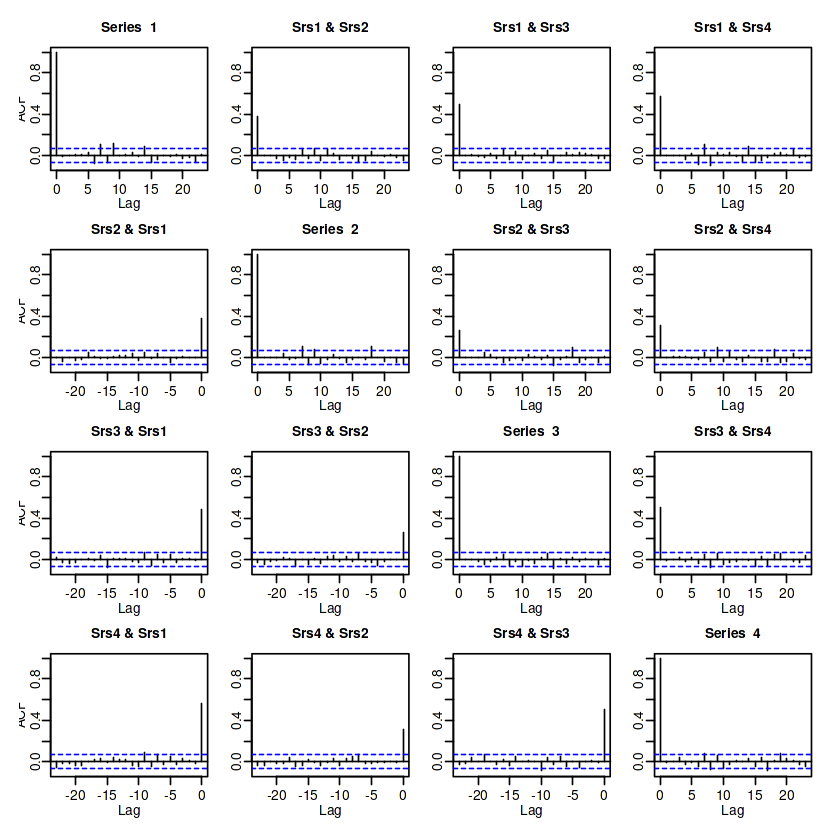

In [20]:
#Podemos igualmente visualizar los rezagos de los residuales, en búsuqueda de rezagos no capturados por el modelo.
acf(resi) 

Podemos ver que para un VAR(2) el modelo muestra los p-valores de los primeros 3 rezagos en 1, porl o que cumple y podemos decir que es un modelo óptimo

<a id="11"></a> <br>
#### Simplificación modelo
Procedemos con la simplificación del modelo, indicando el modelo del cual partimos y un punto de corte que corresponde estándar. 

In [21]:
# Aplicamos para la simplificación, la función refVAR().
m2=refVAR(m1,thres = 1.96)

Constant term: 
Estimates:  0 0 0 0 
Std.Error:  0 0 0 0 
AR coefficient matrix 
AR( 1 )-matrix 
       [,1] [,2] [,3] [,4]
[1,] -0.110    0    0    0
[2,]  0.000    0    0    0
[3,] -0.712    0    0    0
[4,]  0.000    0    0    0
standard error 
       [,1] [,2] [,3] [,4]
[1,] 0.0329    0    0    0
[2,] 0.0000    0    0    0
[3,] 0.2832    0    0    0
[4,] 0.0000    0    0    0
AR( 2 )-matrix 
      [,1]     [,2]    [,3]    [,4]
[1,] 0.272  0.00000  0.0000 -0.0243
[2,] 0.000  0.00000  0.0000  0.0000
[3,] 0.000  0.00000  0.0000  0.1554
[4,] 0.439 -0.00962 -0.0361  0.0000
standard error 
       [,1]   [,2]   [,3]    [,4]
[1,] 0.0396 0.0000 0.0000 0.00979
[2,] 0.0000 0.0000 0.0000 0.00000
[3,] 0.0000 0.0000 0.0000 0.07076
[4,] 0.1612 0.0049 0.0183 0.00000
  
Residuals cov-mtx: 
                      resi                    
     0.06916045  0.7964631 0.2955451 0.1612436
resi 0.79646312 65.9615073 4.8661706 2.6771853
     0.29554511  4.8661706 5.2722566 1.2711235
     0.16124359  2.67718

##### 


Como podemos observar, ahora contamos con 8 grados de libertad. Procedemos con la revisión de residuales.

<a id="12"></a> <br>
#### Revisión del modelo

Ljung-Box Statistics:  
        m       Q(m)     df    p-value
 [1,]   1.0      17.8     8.0     1.00
 [2,]   2.0      29.5    24.0     0.20
 [3,]   3.0      35.0    40.0     0.70
 [4,]   4.0      61.1    56.0     0.30
 [5,]   5.0      76.7    72.0     0.33
 [6,]   6.0      92.3    88.0     0.36
 [7,]   7.0     127.5   104.0     0.06
 [8,]   8.0     157.3   120.0     0.01
 [9,]   9.0     199.8   136.0     0.00
[10,]  10.0     216.8   152.0     0.00
[11,]  11.0     236.4   168.0     0.00
[12,]  12.0     248.0   184.0     0.00
[13,]  13.0     260.6   200.0     0.00
[14,]  14.0     284.8   216.0     0.00
[15,]  15.0     309.6   232.0     0.00
[16,]  16.0     327.2   248.0     0.00
[17,]  17.0     352.2   264.0     0.00
[18,]  18.0     373.5   280.0     0.00
[19,]  19.0     417.2   296.0     0.00
[20,]  20.0     425.9   312.0     0.00
[21,]  21.0     439.9   328.0     0.00
[22,]  22.0     452.4   344.0     0.00
[23,]  23.0     472.4   360.0     0.00
[24,]  24.0     507.7   376.0     0.00


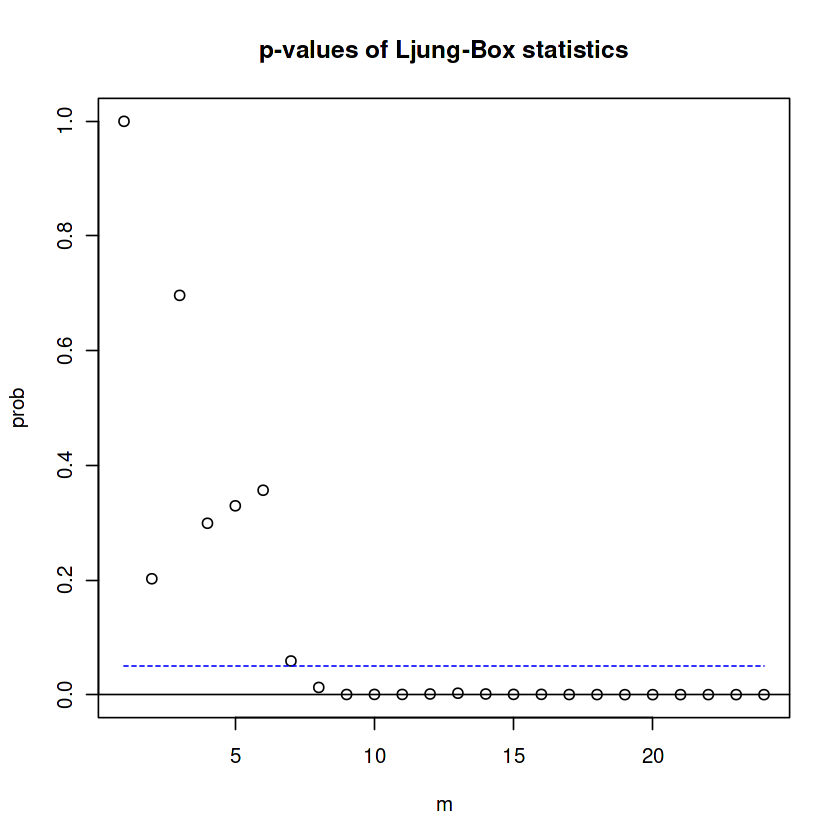

In [22]:
# Separamos nuevamente los residuales del modelo refinado y aplicamos función de revisión mediante función mq()
resi2=m2$residuals
mq(resi2, adj=8)

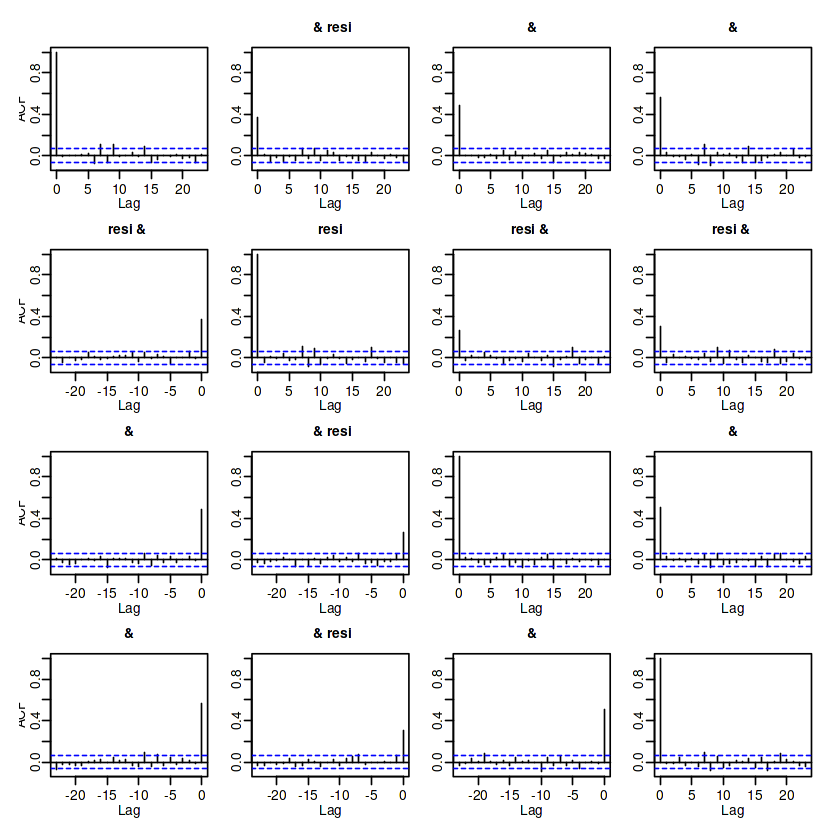

In [23]:
#Podemos visualizar nuevamente los residuales, donde vemos nuevamente la mejoría respecto al modelo completo.
acf(resi2)

In [24]:
# Aplicamos la función de diagnóstico al modelo terminal, esto, para permitir observar si existe una dependencia inmediata en las series.
MTSdiag(m2, adj=8) 

[1] "Covariance matrix:"
       RYLD   TSLA    TM    GM
RYLD 0.0692  0.799 0.296 0.161
TSLA 0.7987 65.988 4.870 2.680
TM   0.2959  4.870 5.278 1.273
GM   0.1614  2.680 1.273 1.187
CCM at lag:  0 
      [,1]  [,2]  [,3]  [,4]
[1,] 1.000 0.374 0.490 0.563
[2,] 0.374 1.000 0.261 0.303
[3,] 0.490 0.261 1.000 0.508
[4,] 0.563 0.303 0.508 1.000
Simplified matrix: 
CCM at lag:  1 
. . . . 
. . . . 
. . . . 
. . . . 
CCM at lag:  2 
. . . . 
. . . . 
. . . . 
. . . . 
CCM at lag:  3 
. . . . 
. . . . 
. . . . 
. . . . 
CCM at lag:  4 
. . . . 
. . . . 
. . . . 
. . . . 
CCM at lag:  5 
. . . . 
. . . . 
. . . . 
. . . . 
CCM at lag:  6 
- . . - 
. . . . 
. . . . 
. . . . 
CCM at lag:  7 
+ + . + 
. + . . 
. . . . 
+ + . + 
CCM at lag:  8 
. . . - 
. - . . 
. . . - 
. . . - 
CCM at lag:  9 
+ + . . 
. + . + 
. . . . 
+ . . . 
CCM at lag:  10 
. . . . 
. . . . 
. . - . 
. . - . 
CCM at lag:  11 
. . . . 
. . . + 
. . . . 
. . . . 
CCM at lag:  12 
. . . . 
. . . . 
. . . . 
. . . . 
CCM at lag: 

Podemos observar que no existen correlaciones instantáneas entre las series. Esto, ya que los p-valores de la matriz de CCM lag 0, son mayores a la significancia del 5%.

<a id="13"></a> <br>
## 1.3 Análisis Impulso - Respuesta
Analicemos ahora las funciones de impulso respuesta.

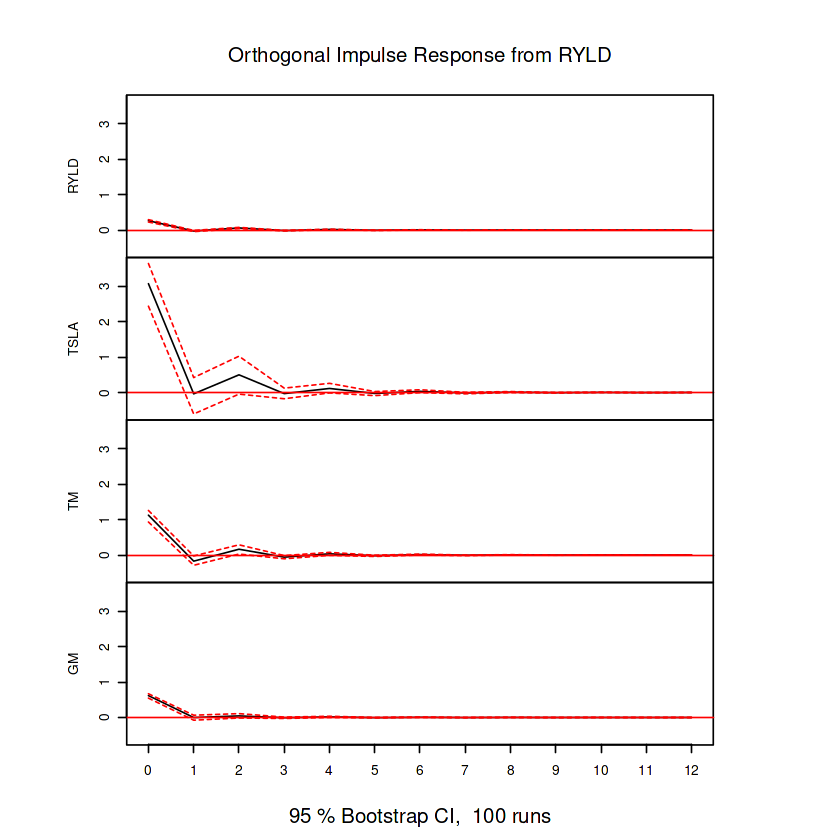

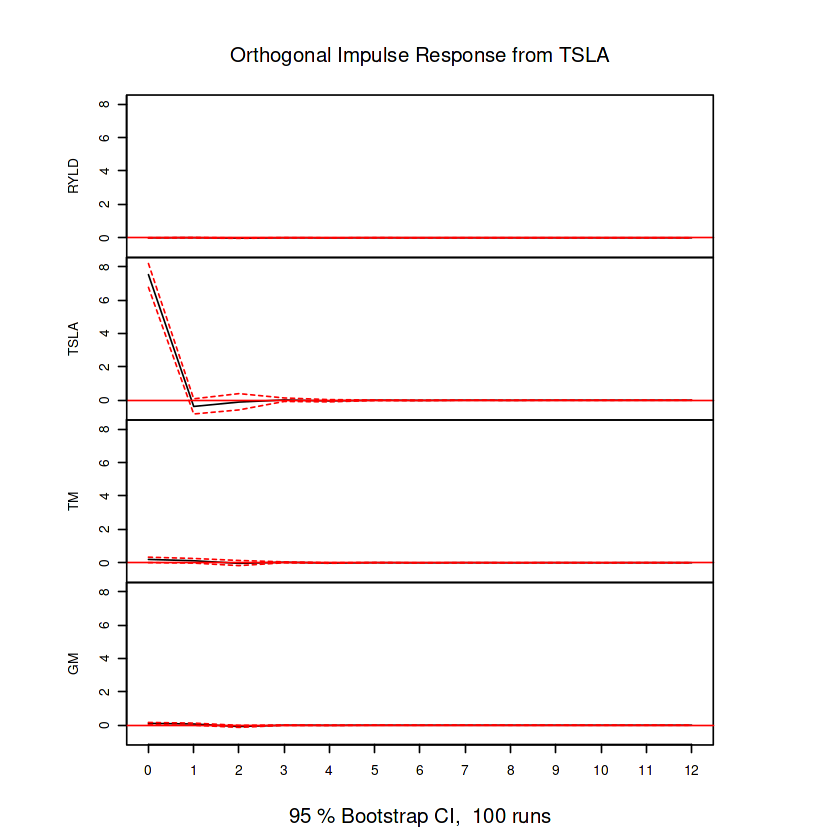

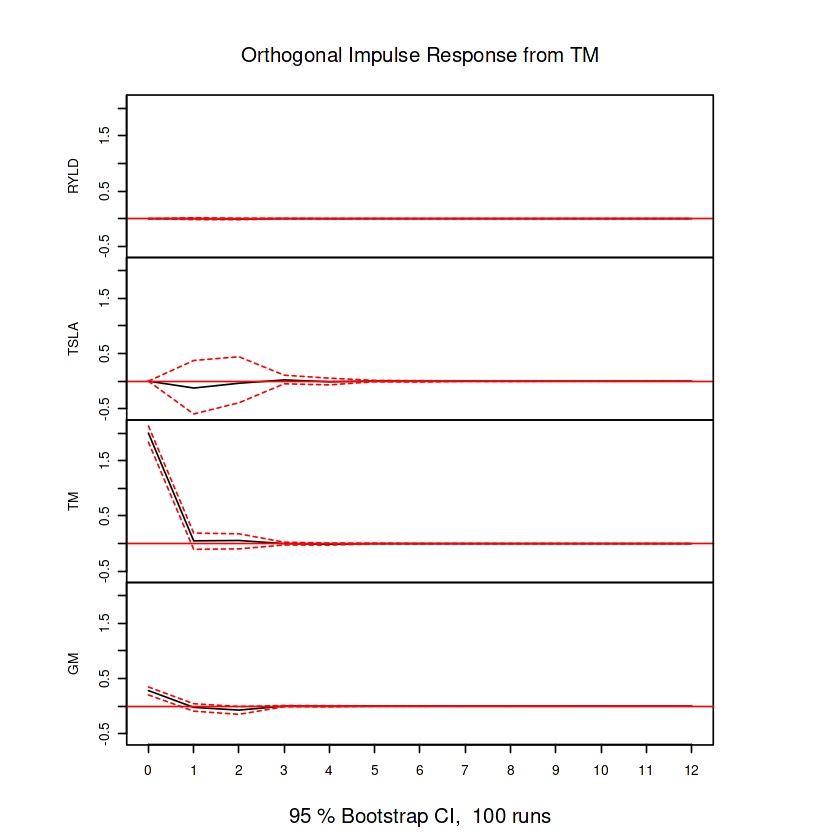

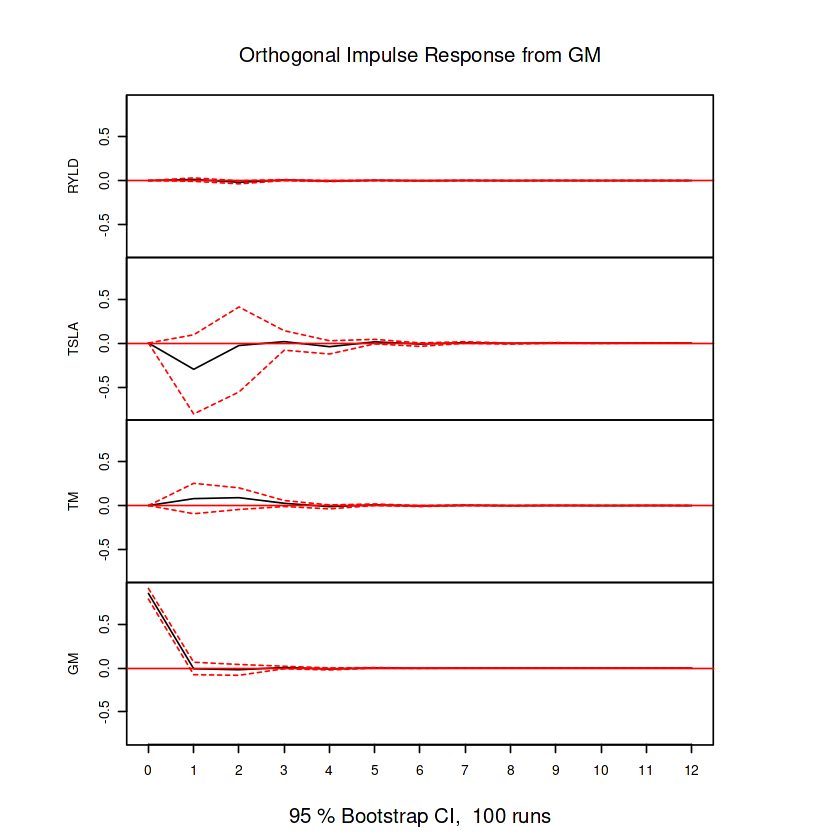

In [25]:
# La función de impulso respuesta se lleva a cabo mediante la librería de vars. La función es la irf(). Apliquemos la función al primer modelo.
m1irf = irf(m0, n.ahead = 12, boot = TRUE)
plot(m1irf) 

* Un choque de una desviación estándar en el índice generaría un impacto en todas las 3 acciones, de mayor dimesión para TSLA en donde vemos una caída de 3 unidades que solo logra estabilizarse hasta el t=3. Aunque TM y GM también caen, únicamente lo hacen en una unidad llegan a estabilizarse mucho más rápido.

* Un choque en TSLA únicamente generaría impacto significativo en sí misma.

* Un choque en TM  generaría una caída en sí misma e impactos ligeros en TSLA y GM. En el índice como es de esperarse, no causa ningún efecto.

* Un choque en GM sí genera un impacto en sí misma, con una caída cercana a una unidad, un impacto en TSLA que no logra estabilizarse sino hasta un t=2 y un ligero aumento en TM.


<a id="15"></a> <br>
## 1.4. Predicción

Apliquemos la predicción al segundo modelo. Esto, ya que la función VARpredict pertenece a la librería de MTS.Podemos generar un pronóstico con los mismos días hacia adelante que tenemos en el conjunto de Test

In [26]:
predm2=VARpred(m2, h)  

orig  885 
Forecasts at origin:  885 
       RYLD TSLA         TM         GM
  6.961e-02    0  3.564e-01  5.704e-02
 -6.868e-02    0  6.232e-02 -7.487e-02
  2.511e-02    0  5.779e-02  1.765e-02
 -1.965e-02    0 -2.952e-02 -3.237e-02
  8.568e-03    0  1.674e-02  8.925e-03
 -5.508e-03    0 -1.113e-02 -7.550e-03
  2.722e-03    0  5.310e-03  3.152e-03
 -1.616e-03    0 -3.112e-03 -2.013e-03
  8.422e-04    0  1.641e-03  1.002e-03
 -4.837e-04    0 -9.127e-04 -5.961e-04
  2.582e-04    0  5.002e-04  3.100e-04
 -1.456e-04    0 -2.765e-04 -1.791e-04
  7.879e-05    0  1.519e-04  9.515e-05
 -4.397e-05    0 -8.396e-05 -5.387e-05
  2.398e-05    0  4.610e-05  2.906e-05
 -1.330e-05    0 -2.545e-05 -1.625e-05
  7.286e-06    0  1.399e-05  8.849e-06
 -4.028e-06    0 -7.715e-06 -4.913e-06
  2.212e-06    0  4.245e-06  2.690e-06
 -1.221e-06    0 -2.339e-06 -1.488e-06
  6.713e-07    0  1.288e-06  8.167e-07
 -3.701e-07    0 -7.094e-07 -4.509e-07
  2.037e-07    0  3.906e-07  2.478e-07
 -1.122e-07    0 -2.151e-0

## 1.5 Desempeño del Modelo

In [27]:

library(Metrics)

rownames(predm2$pred) <- row.names(Pr_tes)
RMSE1<-rmse(Pr_tes[,1],predm2$pred[,1])
RMSE1
MAE1<-mae(Pr_tes[,1],predm2$pred[,1])
MAE1
MSE1<-mse(Pr_tes[,1],predm2$pred[,1])
MSE1


Attaching package: ‘Metrics’


The following object is masked from ‘package:forecast’:

    accuracy


The following object is masked from ‘package:fabletools’:

    accuracy




[1] 0.1331598

[1] 0.1004443

[1] 0.01773152

In [28]:
#Podemos unir los resultados a manera que se generen columnas con los resultados de ajuste de los modelos:
Pr_tes2 <- Pr_tes %>% 
  mutate(
    pred=predm2$pred[,1],
    #pred_ets = pred_ets2
  ) 

In [29]:
## Juntamos los datos, renombramos las columnas y las visualizamos:
dygraph(Pr_tes2[,c(1,4)], main = "RYLD",  "pred") %>%
  dyAxis("y", label = "Prices") %>%
  dyOptions(colors = RColorBrewer::brewer.pal(4, "Set1"))

HTML widgets cannot be represented in plain text (need html)

## 1.6 Entrenamiento del Modelo con el 100% de los datos

Se entrena el modelo y luego se refina para obtener las predicciones usando el 100% de los datos. 

In [30]:
mod_varfinal=MTS::VAR(z,2) 
mfinal=refVAR(mod_varfinal,thres = 1.96)
summary(mfinal)

Constant term: 
Estimates:  -0.005813678 0.1381135 0.009695119 -0.004087743 
Std.Error:  0.008501148 0.2660752 0.07498849 0.03548096 
AR coefficient matrix 
AR( 1 )-matrix 
        [,1]      [,2]     [,3]    [,4]
[1,] -0.1387  0.000355 -0.00161  0.0149
[2,]  1.1687 -0.036652  0.00362 -0.3614
[3,] -1.0787  0.013569  0.01033  0.0919
[4,] -0.0592  0.009652 -0.00722 -0.0113
standard error 
       [,1]    [,2]    [,3]   [,4]
[1,] 0.0415 0.00115 0.00452 0.0101
[2,] 1.2978 0.03597 0.14138 0.3166
[3,] 0.3658 0.01014 0.03984 0.0892
[4,] 0.1731 0.00480 0.01885 0.0422
AR( 2 )-matrix 
      [,1]     [,2]      [,3]    [,4]
[1,] 0.274 -0.00210 -7.82e-05 -0.0189
[2,] 2.081 -0.00173 -3.53e-02  0.0181
[3,] 0.217 -0.00935  8.48e-03  0.1364
[4,] 0.419 -0.00825 -3.36e-02 -0.0123
standard error 
       [,1]    [,2]    [,3]   [,4]
[1,] 0.0416 0.00115 0.00451 0.0101
[2,] 1.3022 0.03599 0.14122 0.3159
[3,] 0.3670 0.01014 0.03980 0.0890
[4,] 0.1737 0.00480 0.01883 0.0421
  
Residuals cov-mtx: 
           [,1] 

          Length Class  Mode   
data      3728   -none- numeric
order        1   -none- numeric
cnst         1   -none- logical
coef        36   -none- numeric
aic          1   -none- numeric
bic          1   -none- numeric
hq           1   -none- numeric
residuals 3720   -none- numeric
secoef      36   -none- numeric
Sigma       16   -none- numeric
Phi         32   -none- numeric
Ph0          4   -none- numeric
fixed       36   -none- numeric

## 1.7 Pronóstico Final

In [31]:
pred_varfinal=VARpred(mfinal, 10) 

orig  932 
Forecasts at origin:  932 
       RYLD TSLA         TM         GM
 -6.533e-03    0  1.934e-01 -1.098e-01
 -6.535e-03    0  7.804e-05  2.280e-02
  1.446e-03    0 -1.197e-02 -9.852e-03
 -2.391e-03    0  2.424e-03 -2.196e-03
  8.605e-04    0  1.992e-04  9.594e-04
 -6.742e-04    0 -9.390e-04 -8.986e-04
  2.781e-04    0  6.207e-04  2.809e-04
 -1.876e-04    0 -3.320e-04 -1.891e-04
  8.729e-05    0  1.749e-04  6.877e-05
 -5.466e-05    0 -9.016e-05 -4.983e-05
Standard Errors of predictions:  
              resi            
 [1,] 0.2584 8.089 2.278 1.080
 [2,] 0.2599 8.089 2.285 1.080
 [3,] 0.2669 8.089 2.292 1.083
 [4,] 0.2673 8.089 2.293 1.083
 [5,] 0.2678 8.089 2.293 1.083
 [6,] 0.2678 8.089 2.293 1.083
 [7,] 0.2679 8.089 2.293 1.083
 [8,] 0.2679 8.089 2.293 1.083
 [9,] 0.2679 8.089 2.293 1.083
[10,] 0.2679 8.089 2.293 1.083
Root mean square errors of predictions:  
              resi            
 [1,] 0.2596 8.128 2.289 1.085
 [2,] 0.2728 8.089 2.349 1.080
 [3,] 0.3227 8.089 2.35

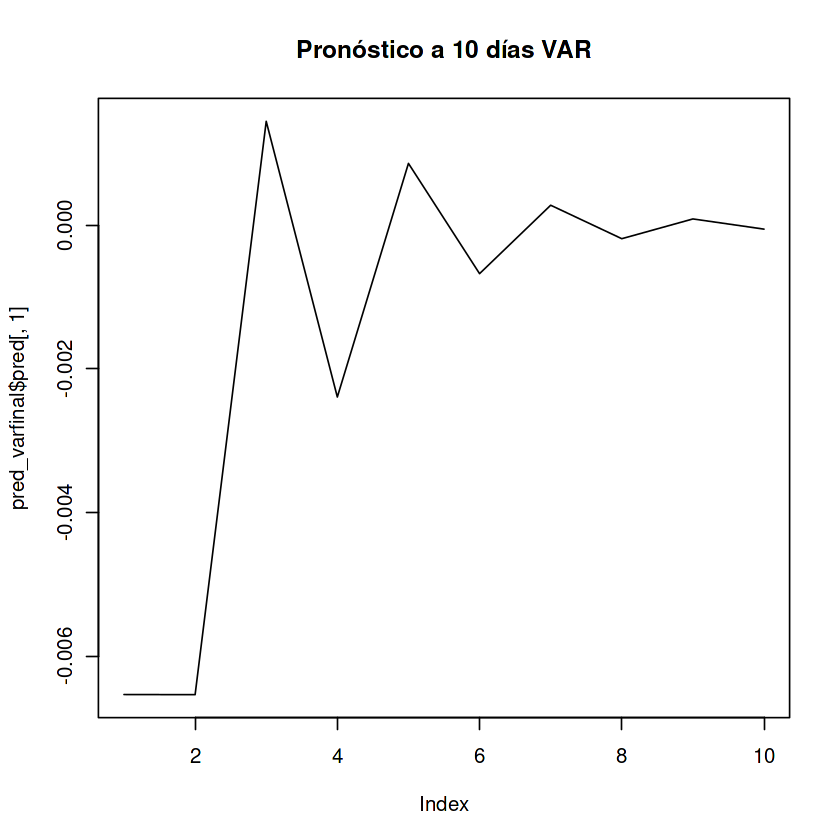

In [54]:
plot(pred_varfinal$pred[,1], type = "l",main = "Pronóstico a 10 días VAR")

<a id="16"></a> <br>
## 1.8 Recuperación del nivel en el pronóstico

Ya que los resultados de pronóstico están en unidades diferenciadas de las series, un paso ideal es la aplicación de una función que permita la recuperación del nivel. A continuación, una propuesta para tal recuperación.

In [33]:
#Especificamos el horizonte de pronóstico.
nhor=10 #pasos en el pronóstico.
nr_lev <- nrow(z)
mr_lev= as.matrix(z)
tail(mr_lev)
str(mr_lev)

,RYLD,TSLA,TM,GM
2022-12-22,-0.100000,-12.220009,-0.460007,-2.370003
2022-12-23,0.050001,-2.199996,0.139999,0.300003
2022-12-27,-0.030001,-14.050004,-0.979995,-0.510002
2022-12-28,-0.139999,3.610001,-2.029999,-0.790001
2022-12-29,0.059999,9.110001,3.279999,1.139999
2022-12-30,-0.030001,1.360000,-0.830002,-0.029999


 num [1:932, 1:4] 0.162 0.032 -0.059 0.095 0.025 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:932] "2019-04-23" "2019-04-24" "2019-04-25" "2019-04-26" ...
  ..$ : chr [1:4] "RYLD" "TSLA" "TM" "GM"


In [34]:
# Generamos primeramente una estructura de datos con NAs que se poblarán con los valores de pronóstico, que se irán sumando acumuladamente.
m.varf_lev_ft <- rbind(mr_lev[,1:4], matrix(NA, nhor,4 ))
head(m.varf_lev_ft)
tail(m.varf_lev_ft)

,RYLD,TSLA,TM,GM
2019-04-23,0.161999,0.076666,0.779998,0.330002
2019-04-24,0.031999,-0.349333,-2.060005,-0.110001
2019-04-25,-0.059000,-0.735332,0.310005,-0.610000
2019-04-26,0.095001,-0.832667,0.430001,0.569999
2019-04-29,0.025000,0.422000,0.189995,0.329998
2019-04-30,-0.039000,-0.185333,-0.210000,-1.059997


,RYLD,TSLA,TM,GM
,NA,NA,NA,NA
,NA,NA,NA,NA
,NA,NA,NA,NA
,NA,NA,NA,NA
,NA,NA,NA,NA
,NA,NA,NA,NA


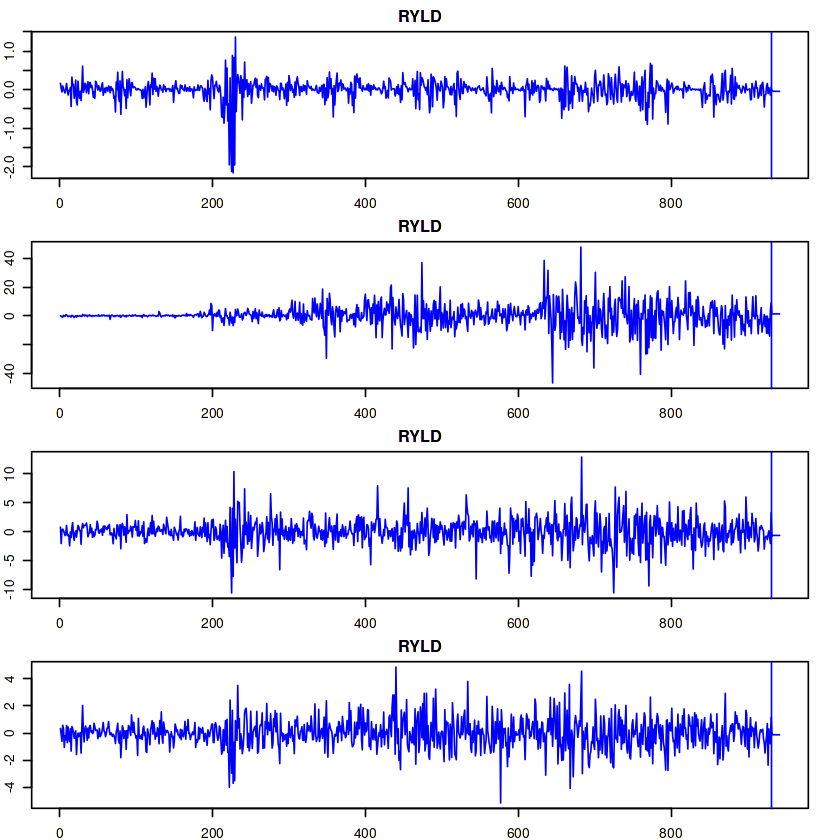

In [60]:
#En la función de recuperación, especificamos los valores que se consideran del modelo seleccionado. Generamos igualmente una visualización del resultado.
m.ft_df <- pred_varfinal$pred
for(h in (nr_lev+1):(nr_lev+nhor)) {
  hf <- h - nr_lev
  m.varf_lev_ft[h,] <- m.varf_lev_ft[h-1,] + m.ft_df[hf,]
}
str.main=c("RYLD","TSLA","TM","GM")
par(mfrow=c(4,1), mar=c(2,2,2,2))

for(i in 1:4) {
  df <- m.varf_lev_ft[,i]
  matplot(df, type=c("l"), col = c("blue"), 
          main = str.main[1]) 
  abline(v=nr_lev, col="blue")
}

In [ ]:
plot(pred_varfinal$pred[,1], type = "l",main = "Pronóstico a 10 días VAR")

# 2. Modelo ARDL

Ya que tenemos que trabajar en formato ts, transformamos la serie con frecuencia diaria.

In [36]:
y <- ts(Pr$RYLD, start = c(2019,4), frequency = 365)
tsla <- ts(Pr$TSLA, start = c(2019,4), frequency = 365)
tm <- ts(Pr$TM, start = c(2019,4), frequency = 365)
gm <- ts(Pr$GM, start = c(2019,4), frequency = 365)

Pr2 <- data.frame(y,tsla,tm,gm)
Pr2

RYLD,TSLA,TM,GM
<dbl>,<dbl>,<dbl>,<dbl>
24.995,17.51667,124.16,39.50
25.157,17.59333,124.94,39.83
25.189,17.24400,122.88,39.72
25.130,16.50867,123.19,39.11
25.225,15.67600,123.62,39.68
25.250,16.09800,123.81,40.01
25.211,15.91267,123.60,38.95
25.124,15.60067,122.92,38.75
25.141,16.27333,122.59,38.25


Comprobemos que las series no son estacionarias. 

In [37]:

library(fUnitRoots)
adfTest(y)
adfTest(tsla)
adfTest(tm)
adfTest(gm)


Attaching package: ‘fUnitRoots’


The following objects are masked from ‘package:urca’:

    punitroot, qunitroot, unitrootTable





Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 1
  STATISTIC:
    Dickey-Fuller: -1.0095
  P VALUE:
    0.2946 

Description:
 Sun May 28 18:46:05 2023 by user: 


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 1
  STATISTIC:
    Dickey-Fuller: -0.4265
  P VALUE:
    0.4804 

Description:
 Sun May 28 18:46:05 2023 by user: 


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 1
  STATISTIC:
    Dickey-Fuller: -0.0794
  P VALUE:
    0.591 

Description:
 Sun May 28 18:46:05 2023 by user: 


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 1
  STATISTIC:
    Dickey-Fuller: -0.5451
  P VALUE:
    0.4426 

Description:
 Sun May 28 18:46:05 2023 by user: 

Los resultados los muestran que contamos con series no estacionarias, con lo cual el modelo ARDL es adecuado. Pasamos a construirlo:

### Creación de conjuntos de entrenamiento y Prueba para modelo ARDL

In [38]:
#Partimos serie para train & test
h <- round(nrow(Pr)*0.05)
Pr_tra <- Pr[1:(nrow(Pr) - h), ]
Pr_tes<- Pr[(nrow(Pr) - h + 1):nrow(Pr), ]

h

[1] 47

## 2.1 Construcción del modelo ARDL

In [39]:
#Se realiza una búsqueda tipo grid search:
#Selección automatica:#

Pr_tra = data.frame(Pr_tra)
models <- auto_ardl(RYLD ~ TSLA +TM + GM, data = Pr_tra, max_order = 6)

In [40]:
#Revisemos el top 20 de los mejores modelos según su critrio de información de Akaike
models$top_orders

RYLD,TSLA,TM,GM,AIC
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,1,1,3,-307.4131
3,1,2,3,-305.8613
3,2,1,3,-305.5587
3,1,1,4,-304.8609
4,1,1,3,-304.0697
3,2,2,3,-303.9720
4,1,1,4,-303.0164
4,1,2,3,-302.5228
4,2,1,3,-302.2174


In [41]:
#Procedemos a construir el modelo de regresión con la mejor combinación.
mod1 <- ardl(RYLD ~ TSLA +TM + GM, data = Pr_tra, order = c(3,1,1,3))
summary(mod1)


Time series regression with "ts" data:
Start = 4, End = 886

Call:
dynlm::dynlm(formula = full_formula, data = data, start = start, 
    end = end)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.67649 -0.10110  0.00956  0.11214  0.73684 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.1488488  0.0915044   1.627 0.104166    
L(RYLD, 1)   0.8668074  0.0309039  28.049  < 2e-16 ***
L(RYLD, 2)   0.3373509  0.0390773   8.633  < 2e-16 ***
L(RYLD, 3)  -0.2217837  0.0306534  -7.235 1.02e-12 ***
TSLA         0.0062359  0.0008919   6.992 5.41e-12 ***
L(TSLA, 1)  -0.0066197  0.0008909  -7.430 2.59e-13 ***
TM           0.0274560  0.0034883   7.871 1.04e-14 ***
L(TM, 1)    -0.0262163  0.0035202  -7.447 2.29e-13 ***
GM           0.0944349  0.0074301  12.710  < 2e-16 ***
L(GM, 1)    -0.0781005  0.0104085  -7.504 1.53e-13 ***
L(GM, 2)    -0.0346547  0.0103583  -3.346 0.000856 ***
L(GM, 3)     0.0214165  0.0075761   2.827 0.004809 ** 
---
Signif. codes

In [42]:
# Para la interpretación, podemos imprimir los rezagos correspondientes de cada variable que explican la respuesta. Esto no indica que sean I(d), sino el número de rezagos que logran una corrección al error.
mod1$full_formula

RYLD ~ L(RYLD, 1) + L(RYLD, 2) + L(RYLD, 3) + TSLA + L(TSLA, 
    1) + TM + L(TM, 1) + GM + L(GM, 1) + L(GM, 2) + L(GM, 3)

In [43]:
## Un segundo modelo podría contemplar la tendencia, porque Y tenia tendencia:
mod1_ten <- ardl(RYLD ~ TSLA +TM + GM+ trend(RYLD), data = Pr_tra, order = c(3,1,1,3))
summary(mod1_ten)


Time series regression with "ts" data:
Start = 4, End = 886

Call:
dynlm::dynlm(formula = full_formula, data = data, start = start, 
    end = end)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.67659 -0.10117  0.00928  0.11208  0.73648 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.498e-01  9.530e-02   1.572 0.116416    
trend(RYLD) -2.839e-06  8.180e-05  -0.035 0.972325    
L(RYLD, 1)   8.668e-01  3.095e-02  28.004  < 2e-16 ***
L(RYLD, 2)   3.373e-01  3.910e-02   8.628  < 2e-16 ***
L(RYLD, 3)  -2.218e-01  3.067e-02  -7.231 1.05e-12 ***
TSLA         6.237e-03  8.931e-04   6.983 5.72e-12 ***
L(TSLA, 1)  -6.616e-03  8.982e-04  -7.366 4.08e-13 ***
TM           2.746e-02  3.491e-03   7.865 1.09e-14 ***
L(TM, 1)    -2.621e-02  3.527e-03  -7.430 2.59e-13 ***
GM           9.443e-02  7.438e-03  12.696  < 2e-16 ***
L(GM, 1)    -7.811e-02  1.042e-02  -7.498 1.60e-13 ***
L(GM, 2)    -3.465e-02  1.036e-02  -3.344 0.000862 ***
L(GM, 3)     2.14

## 2.2 Predicción

    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
887       19.36144 19.04478 19.67810 18.87714 19.84574
888       19.37379 18.90386 19.84373 18.65509 20.09250
889       19.38368 18.78451 19.98284 18.46734 20.30002
890       19.39158 18.67598 20.10719 18.29716 20.48601
891       19.39791 18.57469 20.22113 18.13890 20.65691
892       19.40297 18.47904 20.32690 17.98994 20.81599
893       19.40701 18.38814 20.42589 17.84878 20.96525
894       19.41025 18.30141 20.51909 17.71443 21.10608
895       19.41284 18.21844 20.60725 17.58616 21.23953
896       19.41492 18.13889 20.69095 17.46340 21.36644
897       19.41657 18.06246 20.77069 17.34564 21.48751
898       19.41790 17.98893 20.84687 17.23248 21.60333
899       19.41896 17.91806 20.91987 17.12352 21.71440
900       19.41981 17.84965 20.98997 17.01846 21.82117
901       19.42049 17.78353 21.05745 16.91697 21.92401
902       19.42103 17.71952 21.12255 16.81880 22.02327
903       19.42147 17.65749 21.18545 16.72369 22.11925
904       

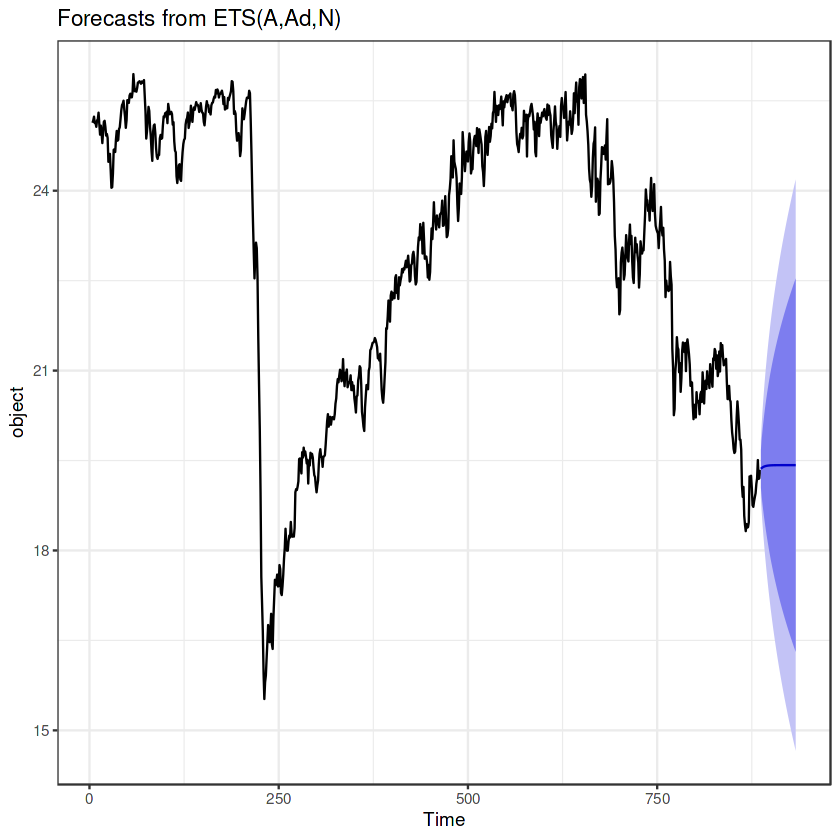

In [44]:
##Predicción del primer modelo sin tendencia:
stats::predict(mod1$fitted.values, h=h)
autoplot(predict(mod1$fitted.values, h=h))

pred_ardl1 <- data.frame(predict(mod1$fitted.values,h=h))

## 2.3 Desempeño del Modelo

In [64]:
rownames(pred_ardl1) <- row.names(Pr_tes)

RMSE1<-rmse(Pr_tes[,1],pred_ardl1[,1])
RMSE1
MAE1<-mae(Pr_tes[,1],pred_ardl1[,1])
MAE1
MSE1<-mse(Pr_tes[,1],pred_ardl1[,1])
MSE1

Pr_tes$ARDL <- pred_ardl1[,1]

[1] 0.3059226

[1] 0.01251865

[1] 0.2400018

[1] 0.09358862

In [65]:

dygraph(Pr_tes[,c(1,5)], main = "RYLD",  "pred ARDL") %>%
  dyAxis("y", label = "Prices") %>%
  dyOptions(colors = RColorBrewer::brewer.pal(4, "Set1"))


HTML widgets cannot be represented in plain text (need html)

## 2.4 Entrenamiento del Modelo con el 100% de los datos

In [46]:
#Procedemos a construir el modelo de regresión con la mejor combinación.
Pr = data.frame(Pr)
ardl_final <- ardl(RYLD ~ TSLA +TM + GM, data = Pr, order = c(3,1,1,3))
summary(ardl_final)


Time series regression with "ts" data:
Start = 4, End = 933

Call:
dynlm::dynlm(formula = full_formula, data = data, start = start, 
    end = end)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.68079 -0.09527  0.01100  0.11051  0.75287 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.1251244  0.0832777   1.502 0.133313    
L(RYLD, 1)   0.8691677  0.0302154  28.766  < 2e-16 ***
L(RYLD, 2)   0.3331719  0.0382673   8.706  < 2e-16 ***
L(RYLD, 3)  -0.2184549  0.0299465  -7.295 6.46e-13 ***
TSLA         0.0059425  0.0008642   6.876 1.14e-11 ***
L(TSLA, 1)  -0.0063057  0.0008642  -7.297 6.37e-13 ***
TM           0.0271981  0.0033956   8.010 3.47e-15 ***
L(TM, 1)    -0.0259828  0.0034262  -7.584 8.23e-14 ***
GM           0.0932308  0.0072608  12.840  < 2e-16 ***
L(GM, 1)    -0.0772961  0.0101365  -7.625 6.06e-14 ***
L(GM, 2)    -0.0335375  0.0100614  -3.333 0.000893 ***
L(GM, 3)     0.0204129  0.0073473   2.778 0.005576 ** 
---
Signif. codes

## 2.5 Predicciones Finales

    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
934       18.84718 18.53604 19.15832 18.37133 19.32302
935       18.84072 18.37839 19.30306 18.13364 19.54781
936       18.83556 18.24547 19.42565 17.93310 19.73803
937       18.83143 18.12607 19.53679 17.75268 19.91019
938       18.82813 18.01614 19.64012 17.58630 20.06996
939       18.82549 17.91365 19.73733 17.43095 20.22003
940       18.82337 17.81735 19.82939 17.28480 20.36195
941       18.82168 17.72640 19.91696 17.14659 20.49677
942       18.82033 17.64014 20.00052 17.01538 20.62528
943       18.81925 17.55804 20.08046 16.89039 20.74810

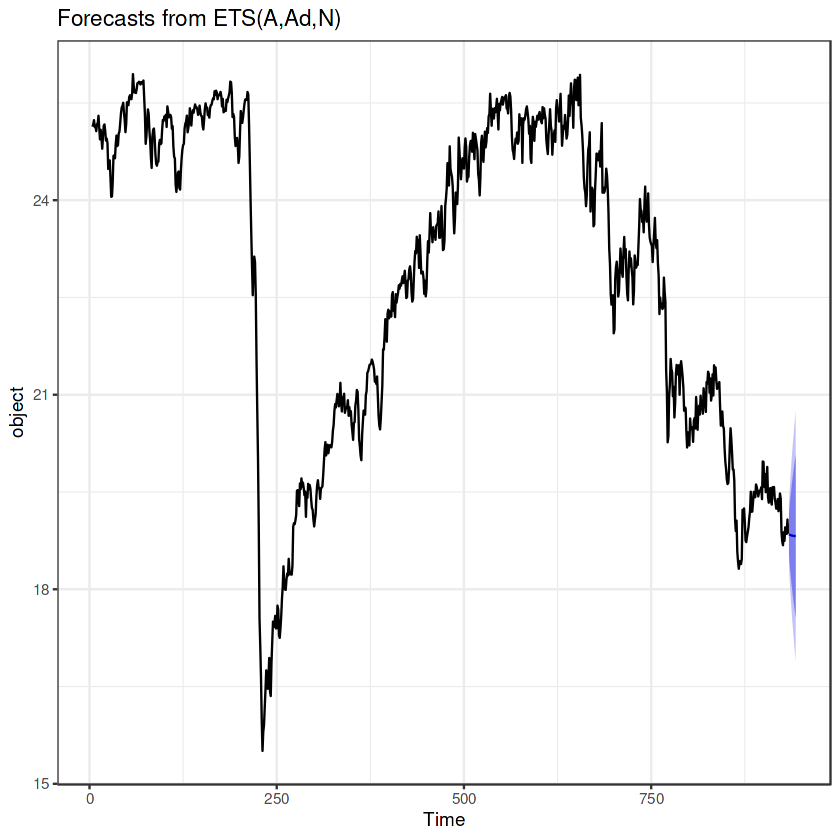

In [47]:
##Predicción del primer modelo sin tendencia:
stats::predict(ardl_final$fitted.values, h=10)
autoplot(predict(ardl_final$fitted.values, h=10))

## 2.6 Bound test para la verificacion de relaciones a largo término

In [48]:
#Guardamos el mejor modelo obtenido en la sección anterior
modelo <- models$best_model
#Realizamos la prueba de hipotesis
bounds_f_test(modelo, case = 2) # el parametro "case" igual a 2 verifica si existe relaciones a largo termino, con la combinación de (restricted constant, no linear trend).


	Bounds F-test (Wald) for no cointegration

data:  d(RYLD) ~ L(RYLD, 1) + L(TSLA, 1) + L(TM, 1) + L(GM, 1) + d(L(RYLD,     1)) + d(L(RYLD, 2)) + d(TSLA) + d(TM) + d(GM) + d(L(GM, 1)) +     d(L(GM, 2))
F = 2.5919, p-value = 0.2228
alternative hypothesis: Possible cointegration
null values:
   k    T 
   3 1000 


In [49]:
#Realizamos la prueba de hipotesis para el modelo con tendencia
bounds_f_test(mod1_ten, case = 4) # el parametro "case" igual a 4 implica (unrestricted constant, linear trend)


	Bounds F-test (Wald) for no cointegration

data:  d(RYLD) ~ trend(RYLD) + L(RYLD, 1) + L(TSLA, 1) + L(TM, 1) +     L(GM, 1) + d(L(RYLD, 1)) + d(L(RYLD, 2)) + d(TSLA) + d(TM) +     d(GM) + d(L(GM, 1)) + d(L(GM, 2))
F = 2.3418, p-value = 0.4841
alternative hypothesis: Possible cointegration
null values:
   k    T 
   3 1000 


A partir de los resultados anteriores, podemos confirmar que existe una relacion a largo plazo entre los activos.

#### Mutiplicadores de largo y corto termino

In [50]:
#Multiplicadores a corto plazo
multipliers(modelo, type = "sr")

,Term,Estimate,Std. Error,t value,Pr(>|t|)
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,(Intercept),0.148848838,0.0915043574,1.626686,1.041655e-01
2,TSLA,0.006235929,0.0008919173,6.991600,5.408960e-12
3,TM,0.027456024,0.0034882962,7.870898,1.043168e-14
4,GM,0.094434868,0.0074301351,12.709711,4.508527e-34


A partir de estos resultados podemos concluir que:

* Un cambio marginal en TSLA manteniendo constantes los demás valores, genera un cambio en el corto plazo o inmediato de 0.006 unidades en la respuesta, RYLD
* Un cambio marginal en TM manteniendo constantes los demás valores, genera un cambio en el corto plazo o inmediato de 0.027 unidades en la respuesta, RYLD
* Un cambio marginal en GM manteniendo constantes los demás valores, genera un cambio en el corto plazo o inmediato de 0.09 unidades en la respuesta, RYLD

In [51]:
#Multiplicadores a largo plazo
multipliers(modelo)

,Term,Estimate,Std. Error,t value,Pr(>|t|)
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,(Intercept),8.44514297,4.021866654,2.099807,0.0360329820
2,TSLA,-0.02177608,0.005783517,-3.765197,0.0001775873
3,TM,0.07034012,0.037839396,1.858912,0.0633766435
4,GM,0.17566843,0.054624280,3.215940,0.0013481144


A partir de estos resultados podemos concluir que:

* Un cambio marginal en TSLA manteniendo constantes los demás valores, genera un cambio en el largo plazo de -0.021 unidades en la respuesta, RYLD
* Un cambio marginal en TM manteniendo constantes los demás valores, genera un cambio en el largo plazo de 0.07 unidades en la respuesta, RYLD
* Un cambio marginal en GM manteniendo constantes los demás valores, genera un cambio en el largo plazo de 0.17 unidades en la respuesta, RYLD